## Análise de Componentes principais

O consumo de vinho, cerveja, e licor (galões/ano), dados de expectativa de vida (anos) e taxa de ocorrência de doença cardíaca (casos/100.000 habitantes/ano) foram avaliados para 10 países. 
Um modelo de PCA utilizando duas componentes principais vai ser ajustado para estudar esse caso. 

In [1]:
#Importando as Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Carregando e mostrando os dados no formato dataframe
paises_df = pd.read_csv('/mnt/c/Users/camil/OneDrive/Área de Trabalho/Scripts-python/Coursera_python_labnotes/exercicio_paises.txt',sep=',')
paises_df

,Países(amostras),Licor,Vinho,Cerveja,Expectativa de Vida,Taxa de doença do coração
0,França,2.5,63.5,40.1,78.0,61.1
1,Itália,0.9,58.0,25.1,78.0,94.1
2,Suíça,1.7,46.0,65.0,78.0,106.4
3,Áustria,1.2,15.7,102.1,78.0,173.0
4,Reino Unido,1.5,12.2,100.0,77.0,199.7
5,EUA,2.0,8.9,87.8,76.0,176.0
6,Rússsia,3.8,2.7,17.1,69.0,373.6
7,República Tcheca,1.0,1.7,140.0,73.0,283.7
8,Japão,2.1,1.0,55.0,79.0,34.7
9,México,0.8,0.2,50.4,73.0,36.4


O primeiro passo é autoescalar os dados já que eles tem unidades muito diferentes

In [3]:
# Transformando os dados em matrizes com numpy
# Criando a matriz x com as 4 primeiras colunas de dados
# Criando a matriz y de escoamento com a ultima coluna da variável paises_df 

x = paises_df.values[:,1:]

# Verificando o tamanho das matrizes
print(x.shape)


(10, 5)


In [4]:
# Mostrando a Matriz de dados x
x

array([[2.5, 63.5, 40.1, 78.0, 61.1],
       [0.9, 58.0, 25.1, 78.0, 94.1],
       [1.7, 46.0, 65.0, 78.0, 106.4],
       [1.2, 15.7, 102.1, 78.0, 173.0],
       [1.5, 12.2, 100.0, 77.0, 199.7],
       [2.0, 8.9, 87.8, 76.0, 176.0],
       [3.8, 2.7, 17.1, 69.0, 373.6],
       [1.0, 1.7, 140.0, 73.0, 283.7],
       [2.1, 1.0, 55.0, 79.0, 34.7],
       [0.8, 0.2, 50.4, 73.0, 36.4]], dtype=object)

In [5]:
# Centrando os dados na média
x_mean = x-x.mean(axis=0)
x_mean

array([[0.7499999999999996, 42.510000000000005, -28.160000000000004,
        2.0999999999999943, -92.77000000000004],
       [-0.8500000000000004, 37.010000000000005, -43.160000000000004,
        2.0999999999999943, -59.77000000000004],
       [-0.05000000000000049, 25.010000000000005, -3.260000000000005,
        2.0999999999999943, -47.47000000000003],
       [-0.5500000000000005, -5.289999999999996, 33.83999999999999,
        2.0999999999999943, 19.129999999999967],
       [-0.25000000000000044, -8.789999999999996, 31.739999999999995,
        1.0999999999999943, 45.829999999999956],
       [0.24999999999999956, -12.089999999999995, 19.539999999999992,
        0.09999999999999432, 22.129999999999967],
       [2.0499999999999994, -18.289999999999996, -51.160000000000004,
        -6.900000000000006, 219.73],
       [-0.7500000000000004, -19.289999999999996, 71.74,
        -2.9000000000000057, 129.82999999999996],
       [0.34999999999999964, -19.989999999999995, -13.260000000000005,
   

In [6]:
# Fazendo a transposta de x para calcular o desvio padrão
transp_x = x.T
transp_x

array([[2.5, 0.9, 1.7, 1.2, 1.5, 2.0, 3.8, 1.0, 2.1, 0.8],
       [63.5, 58.0, 46.0, 15.7, 12.2, 8.9, 2.7, 1.7, 1.0, 0.2],
       [40.1, 25.1, 65.0, 102.1, 100.0, 87.8, 17.1, 140.0, 55.0, 50.4],
       [78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 69.0, 73.0, 79.0, 73.0],
       [61.1, 94.1, 106.4, 173.0, 199.7, 176.0, 373.6, 283.7, 34.7, 36.4]],
      dtype=object)

In [7]:
# Cálculo do desvio padrão de cada coluna
x_std = []
for column in transp_x:
  x_std.append(column.std(ddof=1))

x_std


[0.9131751687868482,
 24.927024602939586,
 38.6717870172961,
 3.21282153600573,
 110.81816989004005]

In [8]:
# Divisão dos dados centrados na média pelo desvio padrão

x_scaled =[]
for row in x_mean:
  x_scaled_row=[]
  for i in range(0,len(row)):
    x_scaled_row.append(row[i]/x_std[i])
  x_scaled.append(x_scaled_row)

x_scaled

[[0.8213101118336074,
  1.7053780255420818,
  -0.7281794344648552,
  0.6536310767546626,
  -0.8371370876459302],
 [-0.930818126744756,
  1.484733962016289,
  -1.1160591048119017,
  0.6536310767546626,
  -0.5393519858639351],
 [-0.05475400745557439,
  1.0033287325054685,
  -0.08429918168875822,
  0.6536310767546626,
  -0.4283593570179186],
 [-0.602294082011313,
  -0.21221947200935318,
  0.8750565363029364,
  0.6536310767546626,
  0.17262512112392595],
 [-0.27377003727786975,
  -0.35262933061667584,
  0.8207533824543501,
  0.34237818306196527,
  0.41356033983844914],
 [0.2737700372778688,
  -0.4850157687321514,
  0.5052779172387523,
  0.031125289369267964,
  0.19969649401319822],
 [2.2449143056785275,
  -0.7337418039794087,
  -1.3229282623303265,
  -2.1476449664796133,
  1.9827975883199327],
 [-0.8213101118336082,
  -0.7738589064386437,
  1.8550991700464738,
  -0.9026333917088241,
  1.171558780738073],
 [0.38327805218901656,
  -0.8019408781601083,
  -0.34288562858678917,
  0.964883970447

In [9]:
# Transformando em matriz a lista criada dos desvio padrão
#from numpy.ma.core import array
#x_scaled = array(x_scaled)
x_scaled = np.array(x_scaled)

In [10]:
# Verificando o novo desvio padrão para ver se os dados estão centrados na média
x_scaled.std(axis=0, ddof=1)

array([1., 1., 1., 1., 1.])

Com os dados já autoescalados, já podemos começar a fazer algumas análises

In [11]:
new_data = pd.DataFrame(data=x_scaled,columns=paises_df.columns[1:], index=paises_df.index)
new_data

,Licor,Vinho,Cerveja,Expectativa de Vida,Taxa de doença do coração
0,0.821310,1.705378,-0.728179,0.653631,-0.837137
1,-0.930818,1.484734,-1.116059,0.653631,-0.539352
2,-0.054754,1.003329,-0.084299,0.653631,-0.428359
3,-0.602294,-0.212219,0.875057,0.653631,0.172625
4,-0.273770,-0.352629,0.820753,0.342378,0.413560
5,0.273770,-0.485016,0.505278,0.031125,0.199696
6,2.244914,-0.733742,-1.322928,-2.147645,1.982798
7,-0.821310,-0.773859,1.855099,-0.902633,1.171559
8,0.383278,-0.801941,-0.342886,0.964884,-1.075365
9,-1.040326,-0.834035,-0.461835,-0.902633,-1.060025


In [12]:
# Cálculo da matriz de correlações 
corr = new_data.corr()
corr

,Licor,Vinho,Cerveja,Expectativa de Vida,Taxa de doença do coração
Licor,1.000000,-0.044005,-0.479160,-0.373038,0.428336
Vinho,-0.044005,1.000000,-0.389820,0.524422,-0.394727
Cerveja,-0.479160,-0.389820,1.000000,0.095653,0.249731
Expectativa de Vida,-0.373038,0.524422,0.095653,1.000000,-0.701743
Taxa de doença do coração,0.428336,-0.394727,0.249731,-0.701743,1.000000


<AxesSubplot:>

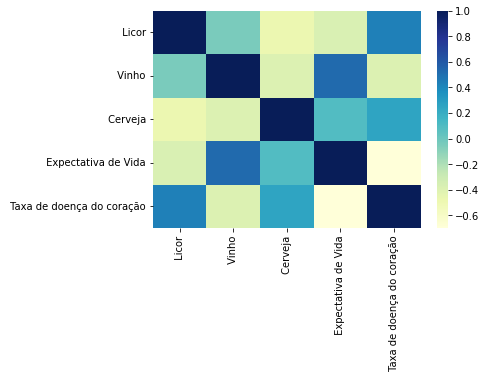

In [13]:
# Mapa de calor das correlações 
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='YlGnBu')

Já pelo mapa de calor, é possível ver algumas associações. Aparentemente, podemos ver uma associação moderada do licor com a taxa de doença do coração e vinho com expectativa de vida. 

Agora, fazendo a análise de componentes principais

In [14]:
# Cálculo do PCA para todas variáveis
from sklearn.decomposition import PCA

pca1 = PCA(n_components=5)
pca1

PCA(n_components=5)

In [15]:
pca1.fit(x_scaled)

PCA(n_components=5)

Fazendo a análise com todas as componetes para ver quanto cada uma consegue mostrar de informação

In [17]:
# Variância das compoentes principais
var_ratio = pca1.explained_variance_ratio_

#arrendondando os valores
np.round(var_ratio,2)

array([0.46, 0.32, 0.12, 0.08, 0.02])

A primeira componente explica 46% da variabilidade dos dados, a segunda explica 32%.

In [18]:
# Variância Acumulada
var_ratio.cumsum()

array([0.46027599, 0.78142365, 0.89827076, 0.98271345, 1.        ])

Vendo a variância acumulada, vemos que as duas primeiras explicam 78% da variabilidade.

#### A) Apresentar a tabela contendo a variância explicada por cada uma das duas componentes principais e a variância acumulada. Qual o percentual de variância que não é explicado pelo modelo de PCA?

Agora vamos fazer a análise de PCA para duas componentes principais.

In [19]:
# Considerando apenas 2 componentes principais
pca1=PCA(n_components=2)
pca_scores = pca1.fit(x_scaled)
pca_x = pca_scores.transform(x_scaled)


In [22]:
# Variância das compoentes principais
var_ratio = pca1.explained_variance_ratio_

#arrendondando os valores
np.round(var_ratio,2)

array([0.46, 0.32])

Como já visto, as duas primeiras componentes principais, explicam apenas 78% da variabilidade dos dados, 22% não é explicado. Quase 1/4 das informações não ficam explicadas.


#### C) Apresente ps gráficos de escores e pesos das duas primeiras componentes principais (gráficos de PC1xPC2). Faça a interpretação desses gráficos indicando:
    - Qual bebida apresenta maior correlação com a expectativa de vida?
    - Existe algum país que apresenta comportamento distinto dos demais? Qual? E o explica esse comportamento pelos gráficos gerados

In [23]:
# Melhorar a visualização
principal_df = pd.DataFrame(data=pca_x,columns=['PC1', 'PC2'], index=paises_df['Países(amostras)'])
principal_df

,PC1,PC2
Países(amostras),,
França,-1.395346,-1.619152
Itália,-1.759635,-0.808364
Suíça,-1.101848,-0.371676
Áustria,-0.331668,1.120326
Reino Unido,0.161888,0.931035
EUA,0.445228,0.405364
Rússsia,3.408518,-2.055630
República Tcheca,1.403245,2.076033
Japão,-0.722391,-0.125959


In [24]:
for index, series in principal_df.iterrows():
    print(index,series)
    break

França PC1   -1.395346
PC2   -1.619152
Name: França, dtype: float64


(-2.0, 4.0)

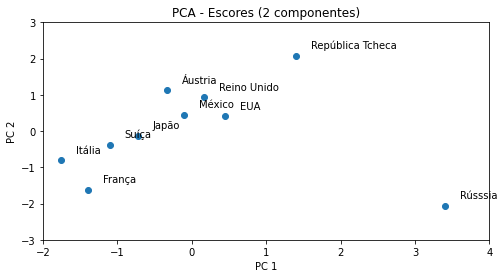

In [25]:
# Gráfico de  Escores PCA
fig, ax = plt.subplots(1,1,figsize=(8,4))

#plotar gráfico de pontos
ax.scatter(principal_df['PC1'], principal_df['PC2'])

#Adicionando legendas
for index, series in principal_df.iterrows():
    ax.text(series[0]+0.2, series[1]+0.2,index)

# Ajuste gráfico
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title("PCA - Escores (2 componentes)")
ax.set_ylim(-3,3)
ax.set_xlim(-2,4)
#ax.grid()


In [27]:
#Calculando os pesos
pesos = pca1.components_
pesos.shape

(2, 5)

In [28]:
pesos

array([[ 0.34589643, -0.44503945,  0.07396122, -0.58497991,  0.57846675],
       [-0.56809194, -0.37836312,  0.72440484,  0.08642298,  0.04337726]])

In [29]:
pesos = pesos.transpose()
pesos

array([[ 0.34589643, -0.56809194],
       [-0.44503945, -0.37836312],
       [ 0.07396122,  0.72440484],
       [-0.58497991,  0.08642298],
       [ 0.57846675,  0.04337726]])

In [30]:
#Criando um dataframe dos pesos para melhorar visualização
pesos_princ = pd.DataFrame(data=pesos,columns=['PC1', 'PC2'],index=['Licor','Vinho','Cerveja','Expectativa de Vida','Taxa de doença do coração'])
pesos_princ

,PC1,PC2
Licor,0.345896,-0.568092
Vinho,-0.445039,-0.378363
Cerveja,0.073961,0.724405
Expectativa de Vida,-0.584980,0.086423
Taxa de doença do coração,0.578467,0.043377


(-1.0, 1.0)

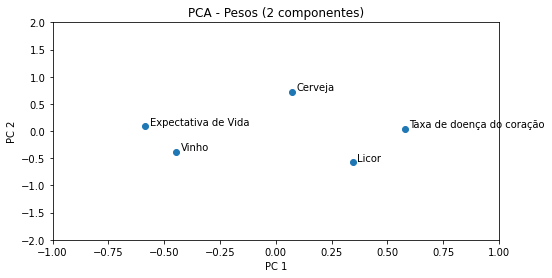

In [31]:
# Gráfico de pesos de PCA
fig, ax = plt.subplots(1,1,figsize=(8,4))

#plotar gráfico de pontos
ax.scatter(pesos_princ['PC1'], pesos_princ['PC2'])

#Adicionando legendas
for index, series in pesos_princ.iterrows():
    ax.text(series[0]+0.02, series[1]+0.02,index)

# Ajuste gráfico
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title("PCA - Pesos (2 componentes)")
ax.set_ylim(-2,2)
ax.set_xlim(-1,1)
#ax.grid()



- Como pode-se ver, no gráfico de pesos, a bebida mais próxima de expectativa de vida é o Vinho, algo que até já pode ser constatado no mapa de calor. No mapa de calor, também foi citado a correlação entre Licor e doença do coração, que também pode ser visto no gráfico de pesos que eles estão relacionados. 

- No gráfico de escores, vemos que a Rússia tem o comportamento mais distinto entre todos os países, ficando muito afastada dos outros pontos. Fica também difícil de ligar a Rússia a qualquer outra bebida ou informação pela distância.

- Comparando agora os dois gráficos, vemos que Japão e Áustria estão muito ligados à Cerveja. Suíça com o vinho. EUA, México e Reino Unido estão correlacionados ao Licor. 


#### B) Apresentar o gráfico dos valores de T² de Hotteling em função dos países e seu respectivo limite com 95% confiança para esse modelo de duas componetes principais. Algum país excede esse limite? Qual o significado dos valores de T² de Hotteling?

Fazendo uma elipse, com limite de 95% de variância, pode-se enxergar quais países estão dentro e fora do limite. Os valores de T2 superiores ao limite significam que esses valores estão distantes do centro, enquanto que os valores inferiores ao limite, indicam que esses valores estão próximos do centro do modelo de PCA. Os limites são definidos pela borda da elipse.

In [32]:
pca_x

array([[-1.39534633, -1.61915249],
       [-1.7596352 , -0.80836378],
       [-1.10184765, -0.37167633],
       [-0.33166825,  1.12032638],
       [ 0.16188835,  0.93103467],
       [ 0.44522832,  0.40536352],
       [ 3.40851816, -2.05563008],
       [ 1.40324511,  2.07603289],
       [-0.72239114, -0.12595857],
       [-0.10799138,  0.44802379]])

In [33]:
from sklearn import decomposition
import scipy

#Calculo do limite da elipse com os escores
theta = np.concatenate((np.linspace(-np.pi, np.pi, 50), np.linspace(np.pi, -np.pi, 50)))
circle = np.array((np.cos(theta), np.sin(theta)))
sigma = np.cov(np.array((pca_x[:, 0], pca_x[:, 1])))
ed = np.sqrt(scipy.stats.chi2.ppf(0.95, 2))
ell = np.transpose(circle).dot(np.linalg.cholesky(sigma) * ed)
a, b = np.max(ell[: ,0]), np.max(ell[: ,1]) #95% limite de confiança para  a elipse
t = np.linspace(0, 2 * np.pi, 100)



#Código adaptado de um código em R

In [34]:
paises = ['França','Itália','Suíça', 'Áustria','Reino Unido','EUA','Rússia','República Tcheca','Japão','México']

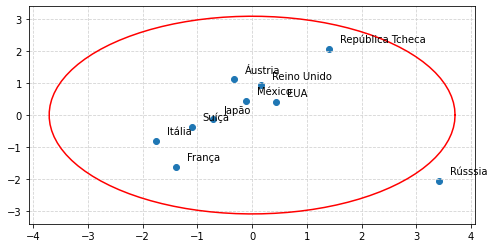

In [35]:
# Gráfico de Elipse
fig, ax = plt.subplots(1,1,figsize=(8,4))

#plotar gráfico de pontos
ax.scatter(pca_x[:, 0], pca_x[:, 1])
ax.plot(a * np.cos(t), b * np.sin(t), color = 'red')

#Adicionando legendas
for index, series in principal_df.iterrows():
    ax.text(series[0]+0.2, series[1]+0.2,index)

# Ajuste gráfico
#ax.set_xlabel()
#ax.set_ylabel()
#ax.set_title()
#ax.set_ylim(-3,3)
#ax.set_xlim(-2,4)
ax.grid(color = 'lightgray', linestyle = '--')

Como pode-se ver, a Rússia encontra-se fora dos limite de confiança de 95%.

Analisando agora todos os valores de T2.

In [36]:
# Cálculo dos valores de teste de T2
import pingouin as pg

pg.multivariate_ttest(pca_x,pesos)

,T2,F,df1,df2,pval
hotelling,0.001035,0.000478,2,12,0.999522


In [37]:
import numpy as np
from sklearn import datasets
from scipy.stats import f

def TwoSampleT2Test(X, Y):
    nx, p = X.shape
    ny, _ = Y.shape
    delta = np.mean(X, axis=0) - np.mean(Y, axis=0)
    Sx = np.cov(X, rowvar=False)
    Sy = np.cov(Y, rowvar=False)
    S_pooled = ((nx-1)*Sx + (ny-1)*Sy)/(nx+ny-2)
    t_squared = (nx*ny)/(nx+ny) * np.matmul(np.matmul(delta.transpose(), np.linalg.inv(S_pooled)), delta)
    statistic = t_squared * (nx+ny-p-1)/(p*(nx+ny-2))
    F = f(p, nx+ny-p-1)
    p_value = 1 - F.cdf(statistic)
    print(f"Test statistic: {statistic}\nDegrees of freedom: {p} and {nx+ny-p-1}\np-value: {p_value}")
    return statistic, p_value

In [38]:
TwoSampleT2Test(pca_x,pesos)

Test statistic: 0.00047767415526237303
Degrees of freedom: 2 and 12
p-value: 0.999522458917168


(0.00047767415526237303, 0.999522458917168)

Fazendo ainda um gráfico com os limites inferiores e superiores, vê-se que a amostra 6 está fora do limite. A amostra 6 é justamente a Rússia, confirmando o que o gráfico com a Elipse já tinha mostrado anteriormente. 

In [39]:
from pca import pca
import pandas as pd
import numpy as np



In [44]:
from pca import pca
# Initialize
model = pca(normalize=True)

# Fit transform and include the column labels and row labels
results = model.fit_transform(x_scaled, col_labels=['Licor','Vinho','Cerveja','Expectativa de Vida','Taxa de doença do coração'], row_labels=paises_df['Países(amostras)'])


[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


/home/camilacalandriny/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/camilacalandriny/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (46.0% expl.var)', ylabel='PC2 (32.1% expl.var)'>)

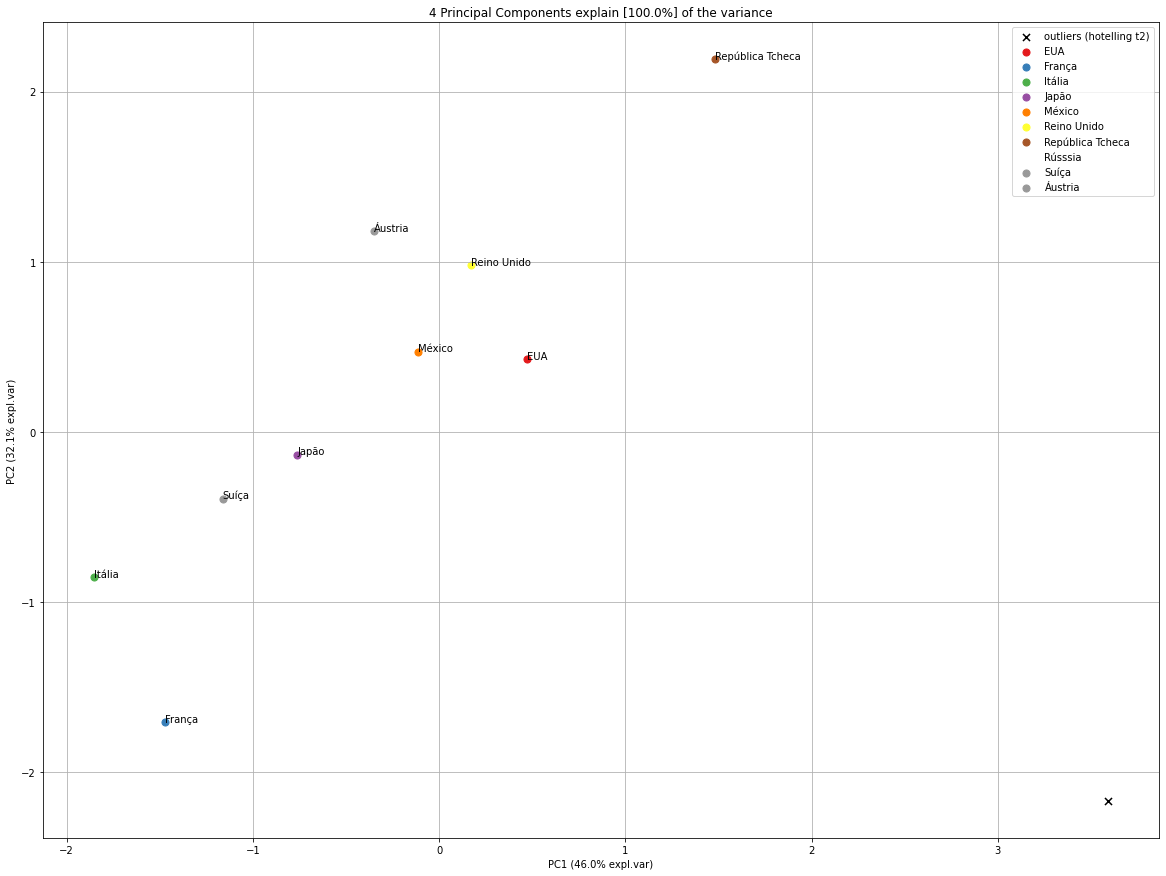

In [45]:
# Include the outlier detection
model.scatter(hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


/home/camilacalandriny/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/camilacalandriny/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


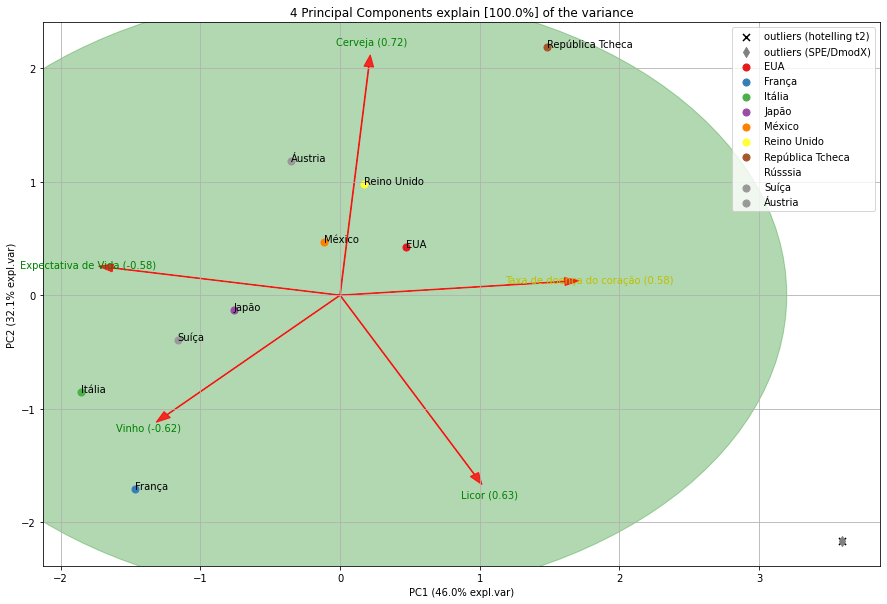

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (46.0% expl.var)', ylabel='PC2 (32.1% expl.var)'>)

In [49]:
# Here again, many other options can be turned on and off
model.biplot(SPE=True, hotellingt2=True)



In [47]:
print(model.results['topfeat'])

    PC                    feature   loading  type
0  PC1        Expectativa de Vida -0.584980  best
1  PC2                    Cerveja  0.724405  best
2  PC3                      Vinho -0.617713  best
3  PC4                      Licor  0.634911  best
4  PC1  Taxa de doença do coração  0.578467  weak


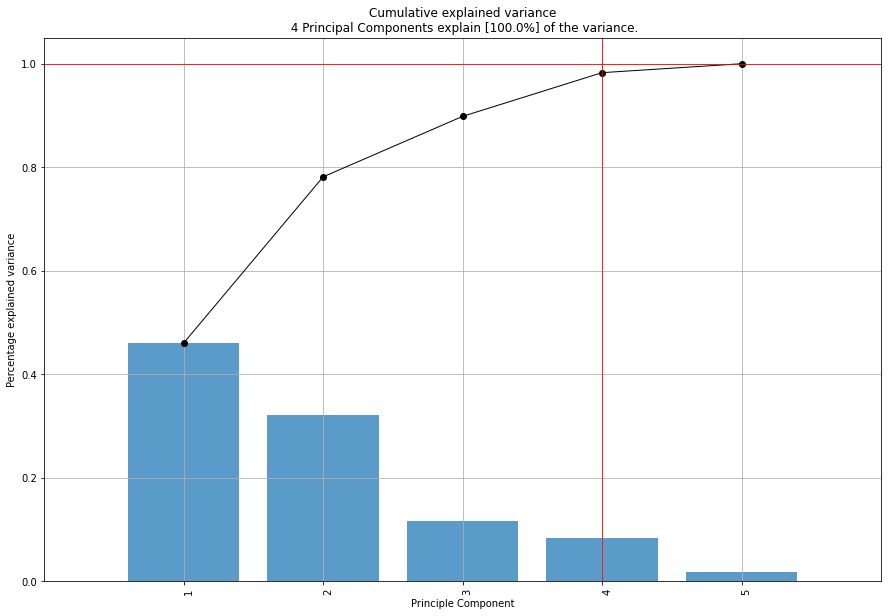

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 4 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [50]:
model.plot()